Exploratory data analysis
=========================

*Fraida Fund*

In this notebook
----------------

In this notebook:

-   We practice using `pandas` to read in and manipulate a data set
-   We learn a basic “recipe” for exploratory data analysis and apply it
    to an example

Introduction
------------

The first step in applying machine learning to a real problem is
*finding* or *creating* an appropriate data set with which to train your
model.

### What makes data “good”?

What makes a good data set?

-   **Size**: the more *samples* are in the data set, the more examples
    your machine learning model will be able to learn from. Often, a
    simple machine learning model trained on a large data set will
    outperform a “fancy” model on a small data set.
-   **Quality**: Are there *predictive* features in the data? Are no
    values (or very few values) missing, noisy, or incorrect? Is the
    scenario in which the data collected similar to the scenario in
    which your model will be used? These are some examples that we might
    ask to evaluate the quality of a data set.

### Purpose of exploratory data analysis

Once we have identified one or more candidate data sets for a particular
problem, we perform some *exploratory data analysis*. This process helps
us

-   detect and possibly correct mistakes in the data
-   check our assumptions about the data
-   determine relationships between features
-   assess the direction and rough size of relationships between
    features and the target variable

Exploratory data analysis is important for understanding whether this
data set is appropriate for the machine learning task at hand, and if
any extra cleaning or processing steps are required before we use the
data.

“Recipe” for exploratory data analysis
--------------------------------------

We will practice using a basic “recipe” for exploratory data analysis.

1.  Learn about your data
2.  Load data and check that it is loaded correctly
3.  Visually inspect the data
4.  Compute summary statistics
5.  Explore the data further and look for potential issues

Every exploratory data analysis is different, as specific
characteristics of the data may lead you to explore different things in
depth. However, this “recipe” can be a helpful starting point.

Example: Brooklyn Bridge pedestrian data set
--------------------------------------------

The Brooklyn Bridge is a bridge that connects Brooklyn and Manhattan. It
supports vehicles, pedestrians, and bikers.

![](https://brooklyneagle.com/wp-content/uploads/2019/01/7-Brooklyn-Bridge-pedestrians-in-bike-lane-to-right-of-white-stripe-January-2019-photo-by-Lore-Croghan-600x397.jpg)

Support you are developing a machine learning model to predict the
volume of pedestrian traffic on the Brooklyn Bridge. There is a dataset
available that you think may be useful as training data: [Brooklyn
Bridge Automated Pedestrian Counts
dataset](https://www1.nyc.gov/html/dot/html/about/datafeeds.shtml#Pedestrians),
from the NYC Department of Transportation.

We will practice applying the “recipe” for exploratory data analysis to
this data.

We will use the `pandas` library in Python, which includes many powerful
utilities for managing data. You can refer to the [`pandas`
reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
for more details on the `pandas` functions used in this notebook.

### Learn about your data

The first step is to learn more about the data:

-   Read about *methodology* and *data codebook*
-   How many rows and columns are in the data?
-   What does each variable mean? What units are data recorded in?
-   How was data collected? Identify sampling issues, timeliness issues,
    fairness issues, etc.

For the Brooklyn Bridge dataset, you can review the associated
documentation on the NYC Data website:

-   [NYC Data
    Website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
-   [Data
    dictionary](https://data.cityofnewyork.us/api/views/6fi9-q3ta/files/845905ea-21d4-4ec7-958a-a1a09214513d?download=true&filename=Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_data_dictionary.xlsx)

### Load data and check that it is loaded directly

The next step is to load the data in preparation for your exploratory
data analysis.

First, we will import some useful libraries:

-   In Python - libraries add powerful functionality
-   You can import an entire library (`import foo`) or part
    (`from foo import bar`)
-   You can define a nickname, which you will use to call functions of
    these libraries (many libraries have “conventional” nicknames)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We will also set up notebook to:

-   show plots “inline” - don’t make me explicitly ask for them to be
    shown
-   show output of all commands in a cell, not just the last one

(depending on whether you are running this on Colab or in your own
Jupyter notebook installation, which have different default settings,
these steps may not be strictly necessary.)

In [0]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Now that we have set everything up, we are ready to read in our data!

In most cases, we will use the `read_csv` function in `pandas` to read
in our data. Function documentation: [pandas
reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

``` python
pandas.read_csv(filepath_or_buffer, 
    sep=',', header='infer', 
    names=None,
    ...)
```

`read_csv` is for “flat” files. Other pandas functions exist for loading
other kinds of data (read from database, Excel file, etc.)

In [0]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

We will want to verify that the data was loaded correctly. For *tabular*
data, we can start by looking at a few rows of data with the `head`
function. (For data that is not tabular, such as image, text, or audio
data, we might start by looking at a few random samples instead.)

In [0]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/25/2019 02:00:00 PM,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)"
3,01/27/2019 09:00:00 PM,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,02/07/2019 04:00:00 AM,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


One thing to look for in the output above, that is easily missed: verify
that column names and row names are loaded correctly, and that the first
row of real data is actually data, and not column labels.

We should also check the shape of the data frame - the number of rows
and columns. This, too, should be checked against our assumptions about
the data from the NYC Data website.

In [0]:
df.shape

(16057, 12)

Check the names of the columns and their data types:

In [0]:
df.columns
df.dtypes

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

We can also get a quick summary with `info()`;

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


`pandas` infers the data type of each column automatically from the
contents of the data.

If the data type of a column is not what you expect it to be, this can
often be a signal that the data needs cleaning. For example, if you
expect a column to be numeric and it is read in as non-numeric, this
indicates that there are probably some samples that include a
non-numeric value in that column. (The [NYC Data
website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
indicates what type of data *should* be in each column, so you should
reference that when checking this output. )

We have a date/time column that was read in as a string, so we can
correct that now:

In [0]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


And once we have done that, we can order the data frame by time:

In [0]:
df = df.sort_values(by='hour_beginning')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
8854,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9481,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10106,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
10741,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
11535,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


You may notice that the `hour_beginning` variable includes the full date
and time in one field. For our analysis, it would be more useful to have
separate fields for the date, month, day of the week, and hour.

We can create these additional fields by assigning the desired value to
them directly - then, observe the effect:

In [0]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8854,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9481,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10106,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10741,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11535,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


For data that is recorded at regular time intervals, it is also
important to know whether the data is complete, or whether there are
gaps in time. We will use some helpful `pandas` functions:

-   [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
-   [`pd.date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)

First, we will use `date_range` to get the list of hour intervals that
we expect to find in the dataset. Then, we will find the difference
between this list and the actual list of hour intervals in the dataset -
these are missing intervals.

In [0]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [0]:
# then identify the missing hours
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='H' )
missing_hours = expected_range.difference(df['hour_beginning'])
print(missing_hours)

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq=None)


We had the expected number of rows (the output of `shape` matched the
description of the data on the NYC Data website), but the data seems to
be missing samples from August 2018 through December 2018, which is
worth keeping in mind if we decide to use it:

In [0]:
pd.unique(missing_hours.date)

array([datetime.date(2018, 8, 1), datetime.date(2018, 8, 2),
       datetime.date(2018, 8, 3), datetime.date(2018, 8, 4),
       datetime.date(2018, 8, 5), datetime.date(2018, 8, 6),
       datetime.date(2018, 8, 7), datetime.date(2018, 8, 8),
       datetime.date(2018, 8, 9), datetime.date(2018, 8, 10),
       datetime.date(2018, 8, 11), datetime.date(2018, 8, 12),
       datetime.date(2018, 8, 13), datetime.date(2018, 8, 14),
       datetime.date(2018, 8, 15), datetime.date(2018, 8, 16),
       datetime.date(2018, 8, 17), datetime.date(2018, 8, 18),
       datetime.date(2018, 8, 19), datetime.date(2018, 8, 20),
       datetime.date(2018, 8, 21), datetime.date(2018, 8, 22),
       datetime.date(2018, 8, 23), datetime.date(2018, 8, 24),
       datetime.date(2018, 8, 25), datetime.date(2018, 8, 26),
       datetime.date(2018, 8, 27), datetime.date(2018, 8, 28),
       datetime.date(2018, 8, 29), datetime.date(2018, 8, 30),
       datetime.date(2018, 8, 31), datetime.date(2018, 9, 1),
  

This is also a good time to look for rows that are missing data in some
columns (“NA” values), that may need to be cleaned.

We can see the number of NAs in each column by summing up all the
instances where the `isnull` function returns a True value:

In [0]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

There are some rows of data that are missing weather, temperature, and
precipitation data. We can see these rows with

In [0]:
df[df['temperature'].isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
12274,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2018-03-11,Sunday
12799,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,"(40.7081639691088, -73.9995087014816)",0,5,2018-05-13,Sunday
479,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
2602,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2138,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
3949,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
5570,2019-02-02 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,2,2019-02-02,Saturday
7704,2019-03-05 00:00:00,Brooklyn Bridge,2,0,2,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,3,2019-03-05,Tuesday
2942,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday


pandas includes routines to fill in missing data using the `fillna`
function
([reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)).
We will fill these using the “forward fill” method, which caries the
last valid observation forward to fill in NAs.

In [0]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


Now we can count the NAs again and find that there are only missing
values in the `events` column. This is the expected result, since there
are many days with no event.

In [0]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

### Visually inspect data

Now we are ready to visually inspect the data.

For tabular data, and especially tabular data with many numeric
features, it is often useful to create a *pairplot*. A pairplot shows
pairwise relationships between all numerical variables. It is a useful
way to identify:

-   features that are predictive - if there is any noticeable
    relationship between the target variable and any other variable.
-   features that are correlated - if two features are highly
    correlated, we may be able to achieve equally good results just
    using one of them.

We can create a “default” pairplot with

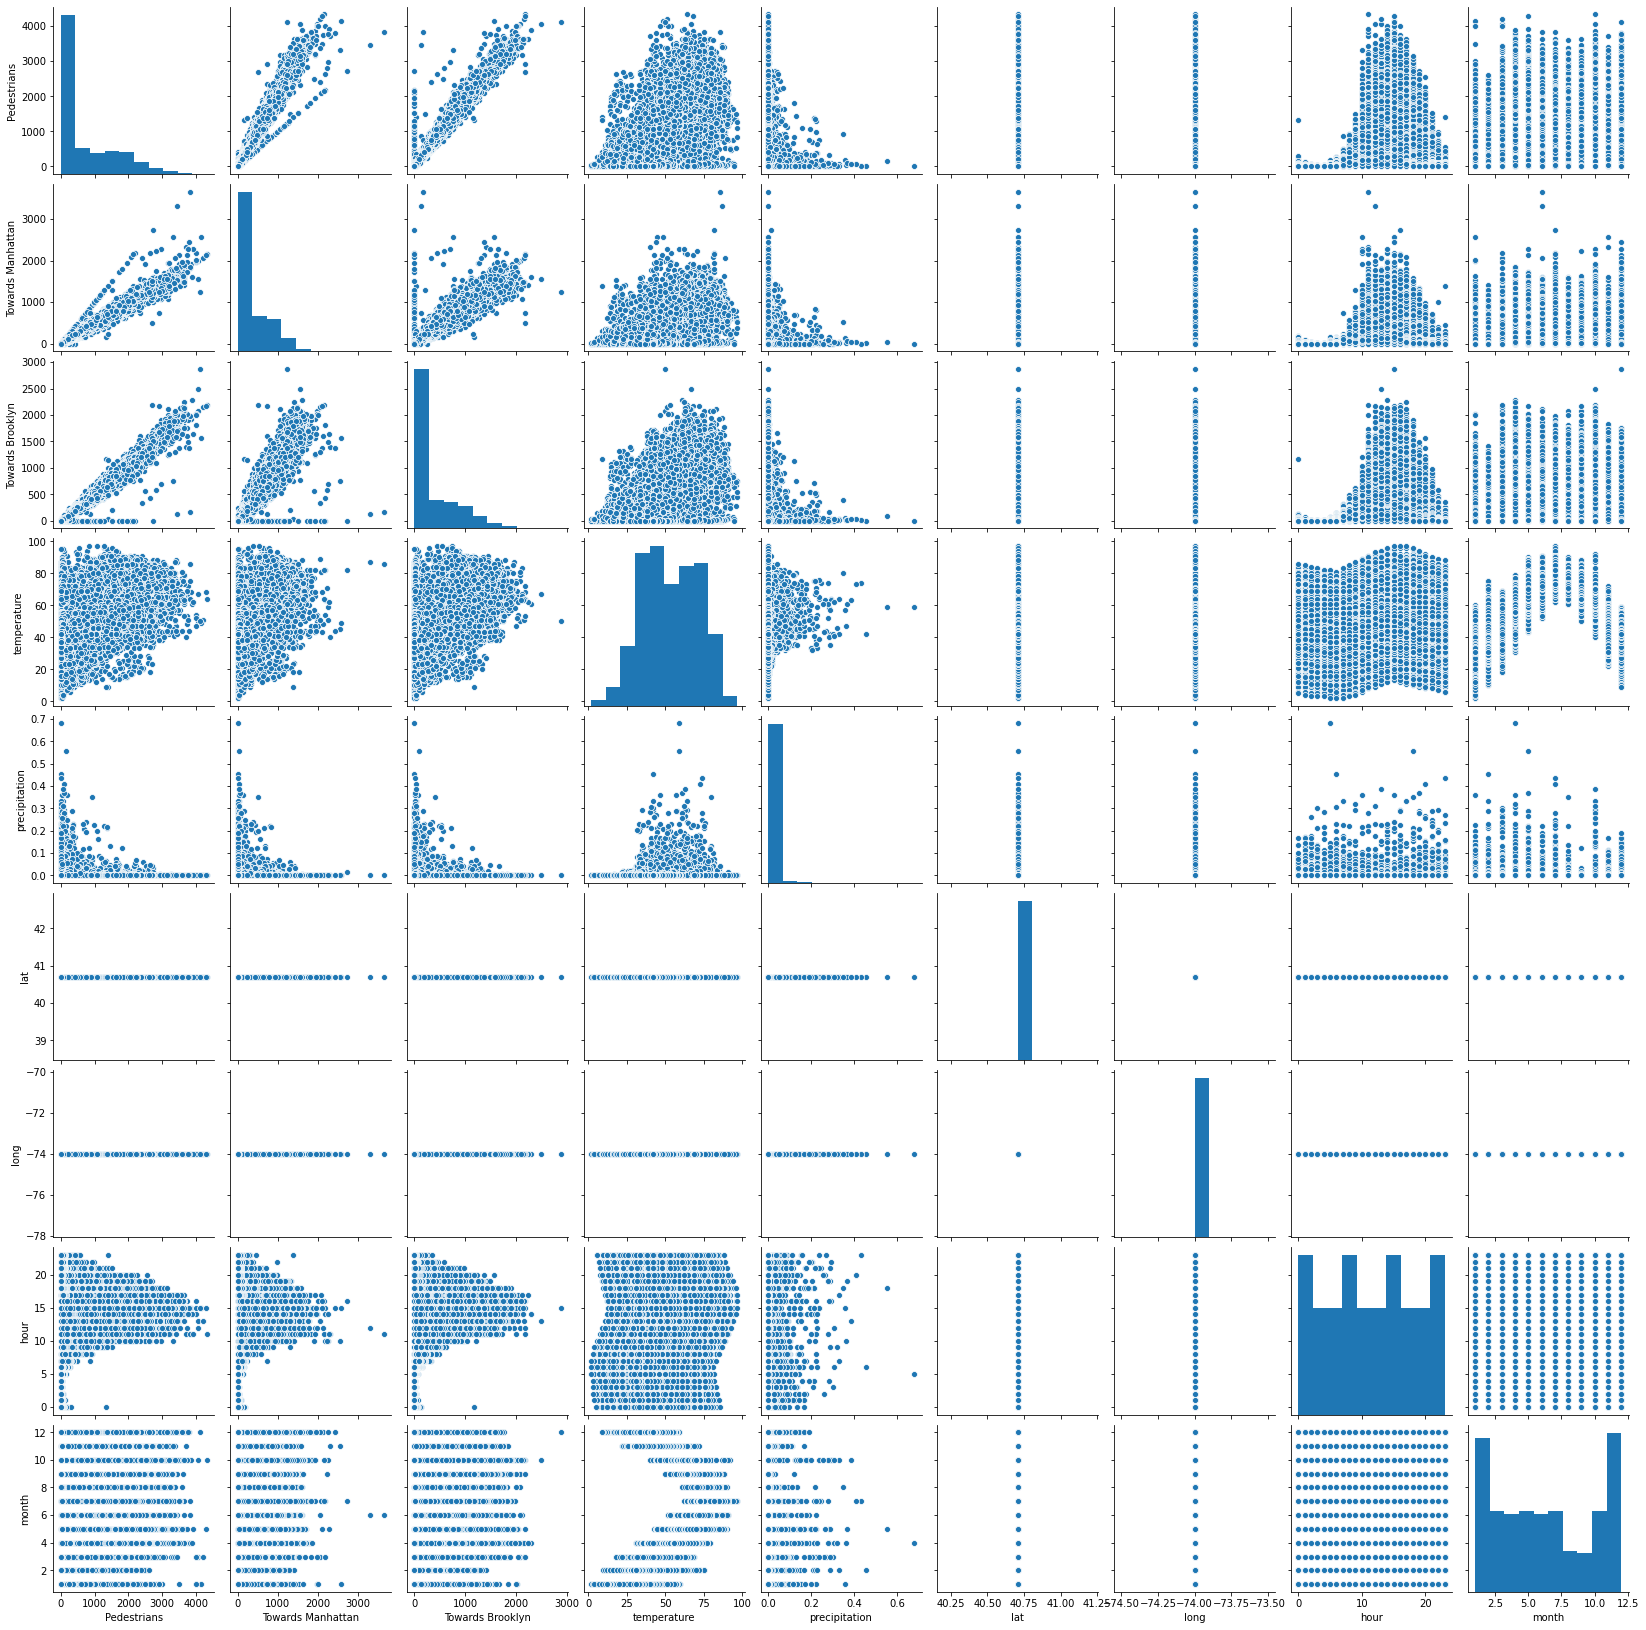

In [0]:
sns.pairplot(df)

Here, each pane shows one numerical variable on the x-axis and another
numerical variable on the y-axis, so that we can see if a relationship
exists between them. The panes along the diagonal shows the empirical
distribution of values for each feature in this data.

But, it is difficult to see anything useful because there is so much
going on in this plot. We can improve things somewhat by:

-   specifying only the variables we want to include, and exluding
    variables that don’t contain useful information, such as `lat` and
    `long`, and
-   making the points on the plot smaller and partially transparent, to
    help with the overplotting.

We’ll also change the histograms on the diagonal, which show the
frequency of values for each variable, into a density plot which shows
the same information in a more useful format.

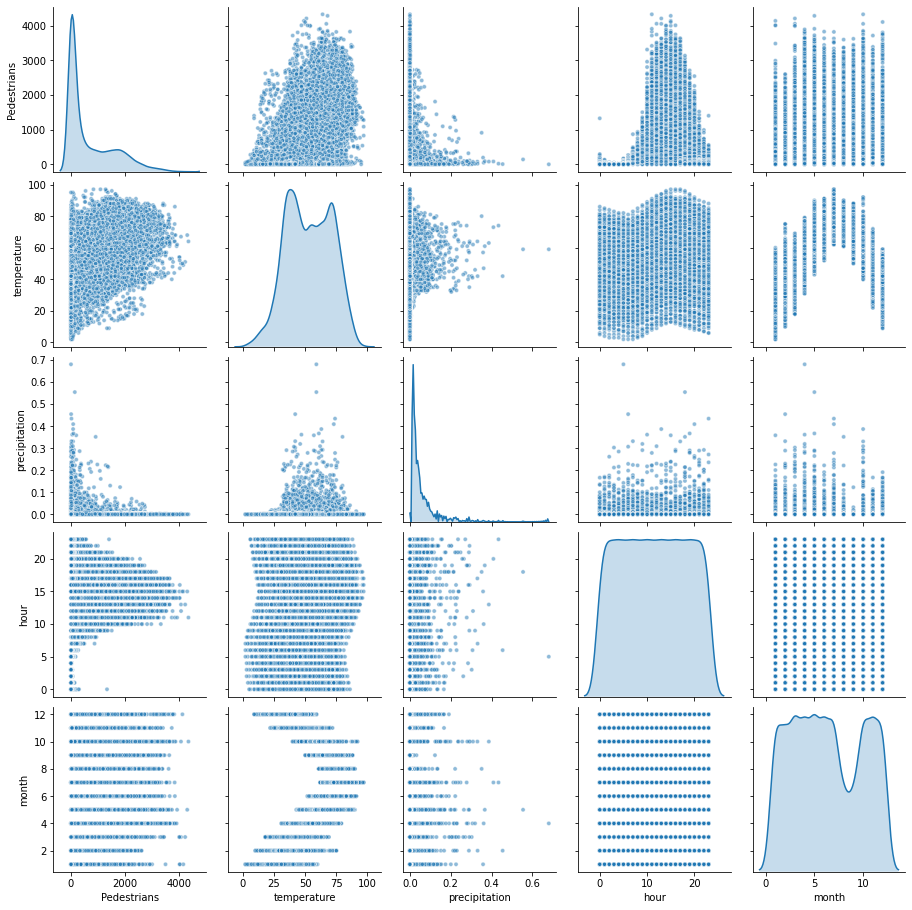

In [0]:
sns.pairplot(df, 
             vars=['Pedestrians', 'temperature', 'precipitation', 'hour', 'month'],
             diag_kind = 'kde',
             plot_kws={'alpha':0.5, 'size': 0.1})

We are mainly interested in the top row of the plot, which shows how the
target variable (`Pedestrians`) varies with the temperature,
precipitation levels, and hour. However, it is also useful to note
relationships between features. For example, there is a natural
relationship between the time of data and the temperature, and between
the month and the temperature.

### Summary statistics

Now, we are ready to explore summary statistics. The “five number
summary” - extremes (min and max), median, and quartiles -can help us
gain a better understanding of the data. We can use the `describe`
function in `pandas` to compute this summary.

In [0]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour,month
count,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04,1.605700e+04,16057.000000,16057.000000
mean,687.106309,334.772436,352.286853,53.206016,0.004613,4.070816e+01,-7.399951e+01,11.499346,6.347076
std,862.244605,417.807545,456.624509,18.036420,0.023389,5.762681e-12,1.125535e-11,6.922682,3.544812
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01,0.000000,1.000000
25%,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01,5.000000,3.000000
50%,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01,11.000000,6.000000
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01,17.000000,10.000000
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01,23.000000,12.000000


We are especially interested in `Pedestrians`, the target variable, so
we can describe that one separately:

In [0]:
df['Pedestrians'].describe()

count    16057.000000
mean       687.106309
std        862.244605
min          0.000000
25%         16.000000
50%        227.000000
75%       1254.000000
max       4330.000000
Name: Pedestrians, dtype: float64

For categorical variables, we can use `groupby` to get frequency and
other useful summary statistics.

For example, we may be interested in the summary statistics for
`Pedestrians` for different weather conditions:

In [0]:
df.groupby('weather_summary')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,1386.569875,861.890079,0.0,611.50,1401.0,1982.50,4330.0
clear-night,3754.0,102.716569,206.459688,0.0,2.00,19.0,93.75,1779.0
cloudy,2383.0,540.437684,727.986539,0.0,9.00,141.0,944.50,3894.0
fog,76.0,234.473684,307.735795,0.0,15.00,110.0,276.50,1321.0
partly-cloudy-day,3169.0,1422.154307,844.930127,0.0,699.00,1433.0,2008.00,4286.0
partly-cloudy-night,2509.0,93.842965,173.241244,0.0,3.00,23.0,97.00,1522.0
rain,920.0,256.165217,421.571020,0.0,10.00,67.5,311.00,2727.0
sleet,14.0,117.928571,157.850204,0.0,7.25,28.0,254.50,404.0
snow,93.0,195.473118,292.630818,0.0,16.00,77.0,258.00,1561.0


Make special note of the `count` column, which shows us the prevalence
of different weather conditions in this dataset. There are some weather
conditions for which we have very few examples.

Another categorical variable is `events`, which indicates whether the
day is a holiday, and which holiday. Holidays have very different
pedestrian traffic characteristics from other days.

In [0]:
df.groupby('events')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
Black Friday,48.0,723.583333,952.014814,0.0,4.00,172.5,1515.50,2913.0
Christmas Day,48.0,832.312500,1199.381546,0.0,6.00,82.5,1480.75,3807.0
Christmas Eve,48.0,705.520833,945.112444,0.0,10.75,113.0,1406.50,2625.0
Cinco de Mayo,48.0,807.750000,1047.286392,3.0,64.25,408.5,848.25,3390.0
Columbus Day (regional holiday),44.0,694.181818,854.264712,0.0,28.75,332.0,878.75,2587.0
Daylight Saving Time ends,48.0,548.687500,719.950003,0.0,14.75,170.0,983.00,2311.0
Daylight Saving Time starts,48.0,504.500000,708.192515,0.0,10.00,123.5,814.25,2232.0
Easter Monday,24.0,581.916667,704.003515,0.0,15.25,380.5,850.25,2242.0
Easter Sunday,48.0,1321.812500,1443.738832,0.0,55.00,410.5,2809.50,3894.0


It can be useful to get the total pedestrian count for the day of a
holiday, rather than the summary statistics for the hour-long intervals.
We can use the `agg` function to compute key statistics, including
summing over all the samples in the group:

In [0]:
df.groupby('events').agg({'Pedestrians': 'sum'})


,Pedestrians
events,
Black Friday,34732
Christmas Day,39951
Christmas Eve,33865
Cinco de Mayo,38772
Columbus Day (regional holiday),30544
Daylight Saving Time ends,26337
Daylight Saving Time starts,24216
Easter Monday,13966
Easter Sunday,63447


### Explore relationships and look for issues

Finally, let’s further explore relationships between likely predictors
and our target variable. We can group by `day_name`, then call the
`describe` function on the `Pedestrians` column to see the effect of day
of the week on traffic volume:

In [0]:
df.groupby('day_name')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,2280.0,696.521053,845.244195,0.0,17.0,243.5,1318.00,3722.0
Monday,2304.0,642.983941,777.944829,0.0,12.0,232.0,1232.00,3657.0
Saturday,2280.0,943.185965,1159.857344,0.0,22.0,241.5,1894.50,4330.0
Sunday,2305.0,753.213015,947.772750,0.0,19.0,206.0,1452.00,3894.0
Thursday,2280.0,601.263158,728.067954,0.0,16.0,214.0,1102.25,3173.0
Tuesday,2328.0,599.210911,731.047235,0.0,14.0,232.5,1122.50,4141.0
Wednesday,2280.0,574.956140,694.807586,0.0,16.0,217.0,1050.00,3807.0


Similarly, we can see the effect of temperature:

In [0]:
df.groupby('temperature')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
temperature,,,,,,,,
2.0,3.0,19.333333,25.929391,1.0,4.50,8.0,28.50,49.0
3.0,4.0,16.000000,32.000000,0.0,0.00,0.0,16.00,64.0
4.0,8.0,27.375000,25.767851,0.0,6.25,24.5,40.50,77.0
5.0,5.0,20.000000,41.418595,0.0,0.00,1.0,5.00,94.0
6.0,10.0,54.200000,85.590498,0.0,4.25,10.5,79.75,275.0
...,...,...,...,...,...,...,...,...
93.0,3.0,1271.333333,707.043374,455.0,1062.00,1669.0,1679.50,1690.0
94.0,4.0,1035.750000,746.532596,101.0,599.75,1202.0,1638.00,1638.0
95.0,3.0,476.666667,765.789353,0.0,35.00,70.0,715.00,1360.0


And the effect of precipitation:

In [0]:
df.groupby('precipitation')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
precipitation,,,,,,,,
0.0000,12338.0,731.183336,901.428828,0.0,15.00,236.0,1390.75,4286.0
0.0001,226.0,548.982301,652.851843,0.0,52.25,256.0,931.00,4330.0
0.0002,224.0,753.151786,849.076567,0.0,41.75,347.0,1389.50,3816.0
0.0003,154.0,705.051948,733.243531,0.0,50.00,493.5,1230.00,3485.0
0.0004,130.0,717.253846,766.100731,0.0,22.25,438.0,1243.00,2733.0
...,...,...,...,...,...,...,...,...
0.4090,1.0,81.000000,NaN,81.0,81.00,81.0,81.00,81.0
0.4340,1.0,18.000000,NaN,18.0,18.00,18.0,18.00,18.0
0.4543,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0


We can even plot it separately, by saving it in a new data frame and
plotting *that* data frame:

In [0]:
df_precip = df.groupby('precipitation')['Pedestrians'].describe()
df_precip = df_precip.reset_index()
sns.scatterplot(data=df_precip, x='precipitation', y='50%')

We see that certain weather conditions (very high temperature, heavy
precipitation, fog) are extremely underrepresented in the dataset. This
would be something to consider if, for example, we wanted to use this
dataset to predict the effect of extreme weather on pedestrian traffic.

Prepare for the live session
----------------------------

In our live recitation section this week, we will review the Brooklyn
Bridge pedestrian example. Then, we’ll practice applying our “recipe”
for exploratory data analysis to a few other tabular, text, and image
data sets.

In preparation for the live meeting, consider the following machine
learning tasks, and candidate data sets. Try applying the first step of
our “recipe” - learn about the data - to these examples. Do these data
sets seem appropriate for the task? Without an in-depth analysis, can
you identify any important limitations of the datasets, or problems that
need addressing before we use them to train a machine learning model?

#### Satirical headline classification:

You are hired by a major social media platform to develop a machine
learning model that will be used to clearly mark *satirical news
articles* when they are shared on social media. You consider using this
dataset of 9,000 headlines from [The Onion](https://www.theonion.com/)
and 15,000 headlines from [Not The Onion on
Reddit](https://www.reddit.com/r/nottheonion/). [Link to OnionOrNot
data](https://github.com/lukefeilberg/onion)

#### Chest X-ray classification:

You are working for a large hospital system to develop a machine
learning model that, given a chest X-ray, should identify those that
likely have COVID-19 so that they can take proper precautions against
the spread of infection within the hospital. You consider using two
datasets together: one with several hundred images of chest X-rays of
likely COVID-19 patients, and a pre-COVID dataset of chest X-ray images.
[Link to COVID-19 chest X-ray
data](https://github.com/ieee8023/covid-chestxray-dataset), [Link to
pre-COVID chest X-ray
data](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview)

#### Taxi tip prediction:

You are developing an app for NYC taxi drivers that will predict what
the typical tip would be for a given fare. You consider using data
collected by the NYC Taxi and Limousine Commission on taxi trips. The
links are for 2019 data, but previous years are also available. [Data
link for yellow (Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp)
and [data link for green (non-Manhattan) taxi
trips](https://data.cityofnewyork.us/Transportation/2019-Green-Taxi-Trip-Data/q5mz-t52e)

#### Highway traffic prediction:

You are working for the state of New York to develop a traffic
prediction model for the NYS Thruway. The following Thruway data is
available: Number and types of vehicles that entered from each entry
point on the Thruway, along with their exit points, at 15 minute
intervals. The link points to the most recent week’s worth of available
data, but this data is available through 2014. [Link to NYS Thruway
data](https://data.ny.gov/Transportation/NYS-Thruway-Origin-and-Destination-Points-for-All-/4dbf-24u2)

#### Offensive post classification:

The social media platform was so impressed with your work on detection
of satirical headlines, that they asked you to work on a model to
identify posts using offensive language. As training data, they hand you
80,000 tweets, labeled as either “hateful”, “abusive”, “spam”, or
“none”, by majority vote of five people. [Link to abusive tweets
data](https://dataverse.mpi-sws.org/dataset.xhtml?persistentId=doi:10.5072/FK2/ZDTEMN)